In [9]:
import pandas as pd
from tqdm import tqdm

In [2]:
import numpy as np
snow = np.loadtxt('St_31510.dat', unpack = True)
df = pd.read_csv('fixed_data.csv')
df = df[~(df['Timestamp'] > '2020-12-31')]
snow_high = []
snow_level = []
snow_Q1 = []
snow_Q2 = []
snow_Q3 = []
for date in tqdm(df['Timestamp']):
    year = int(date[0:4])
    month = int(date[5:7])
    day = int(date[8:10])
    for i in range(len(snow[0])):
        if day <= snow[3][i] and month == snow[2][i] and year == snow[1][i]:
            snow_high.append(snow[4][i])
            snow_level.append(snow[5][i])
            snow_Q1.append(snow[6][i])
            snow_Q2.append(snow[7][i])
            snow_Q3.append(snow[8][i])
            break
        if  month < snow[2][i] and year == snow[1][i]:
            snow_high.append(snow[4][i])
            snow_level.append(snow[5][i])
            snow_Q1.append(snow[6][i])
            snow_Q2.append(snow[7][i])
            snow_Q2.append(snow[8][i])
            break
        if  year < snow[1][i]:
            snow_high.append(snow[4][i])
            snow_level.append(snow[5][i])
            snow_Q1.append(snow[6][i])
            snow_Q2.append(snow[7][i])
            snow_Q3.append(snow[8][i])
            break
df['snow_high'] = snow_high
df['snow_level'] = snow_level
df['snow_Q1'] = snow_Q1
df['snow_Q2'] = snow_Q2
df['snow_Q3'] = snow_Q3
df = df.drop(['snow_Q2', 'snow_Q3'], axis=1)
df.describe()

  1%|          | 41/4749 [00:03<05:50, 13.42it/s]


KeyboardInterrupt: 

In [5]:
'''prediction = {}
NUMBER_OF_DAYS = 365
DAYS_TO_PREDICT = 4
df = df.drop(['snow_Q1'], axis=1)
prediction['to_predict' + str(DAYS_TO_PREDICT)] = []
try:
    for collum_name in df:
        print(collum_name)
        if collum_name != 'Timestamp':
            for i in range(NUMBER_OF_DAYS):
                prediction[collum_name + str(i)] = []
            for i in range(len(df[collum_name])):
                if i + NUMBER_OF_DAYS + DAYS_TO_PREDICT>= len(df[collum_name]):
                    break
                counter = 0
                for j in range(i, i + NUMBER_OF_DAYS):
                    prediction[collum_name + str(counter)].append(df[collum_name][j].astype(int))
                    counter += 1
                prediction['to_predict' + str(DAYS_TO_PREDICT)].append(df['Value-2366-zeya-blagoveshensk'][i 
                            + NUMBER_OF_DAYS + DAYS_TO_PREDICT].astype(int) )
except ValueError:
    pass

prediction = pd.DataFrame(prediction)
prediction.head()'''

"prediction = {}\nNUMBER_OF_DAYS = 365\nDAYS_TO_PREDICT = 4\ndf = df.drop(['snow_Q1'], axis=1)\nprediction['to_predict' + str(DAYS_TO_PREDICT)] = []\ntry:\n    for collum_name in df:\n        print(collum_name)\n        if collum_name != 'Timestamp':\n            for i in range(NUMBER_OF_DAYS):\n                prediction[collum_name + str(i)] = []\n            for i in range(len(df[collum_name])):\n                if i + NUMBER_OF_DAYS + DAYS_TO_PREDICT>= len(df[collum_name]):\n                    break\n                counter = 0\n                for j in range(i, i + NUMBER_OF_DAYS):\n                    prediction[collum_name + str(counter)].append(df[collum_name][j].astype(int))\n                    counter += 1\n                prediction['to_predict' + str(DAYS_TO_PREDICT)].append(df['Value-2366-zeya-blagoveshensk'][i \n                            + NUMBER_OF_DAYS + DAYS_TO_PREDICT].astype(int) )\nexcept ValueError:\n    pass\n\nprediction = pd.DataFrame(prediction)\nprediction

In [10]:
df = pd.read_csv('dataset_with_rain_and_atm(1).csv')
df

,Timestamp,Value-1002-zeya-malayasazanka,Value-1003-zeya-svobodny,Value-2366-zeya-blagoveshensk,Value-316-zeya-mazanovo,Value-317-zeya-belogorye,snow_high,snow_level,snow_Q1,1.2,1.3,0.1,4,9,8,20,1.4,41,0.3,21.00
0,2008-01-01,435,163,148,218,341,4.0,10.0,0.0,1.0,1.0,12.0,8.0,21.0,8.0,20.0,1.0,11.0,0.0,11.2
1,2008-01-02,441,162,151,222,350,4.0,10.0,0.0,1.0,2.0,15.0,1.0,0.0,8.0,20.0,1.0,11.0,0.0,12.0
2,2008-01-03,447,161,157,226,361,4.0,10.0,0.0,1.0,3.0,15.0,1.0,0.0,8.0,20.0,1.0,11.0,0.0,12.0
3,2008-01-04,447,154,163,230,367,4.0,10.0,0.0,1.0,4.0,0.0,4.0,9.0,8.0,20.0,1.0,11.0,0.0,22.3
4,2008-01-05,443,144,168,222,364,4.0,10.0,0.0,1.0,5.0,15.0,1.0,0.0,8.0,20.0,1.0,11.0,0.0,14.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,2020-12-27,434,167,134,235,343,5.0,10.0,0.0,12.0,27.0,15.0,1.0,0.0,8.0,20.0,1.0,11.0,0.0,12.4
4745,2020-12-28,435,169,134,235,343,5.0,10.0,0.0,12.0,28.0,15.0,1.0,0.0,8.0,20.0,1.0,11.0,0.0,12.0
4746,2020-12-29,438,171,132,232,342,5.0,10.0,0.0,12.0,27.0,15.0,1.0,0.0,8.0,20.0,1.0,11.0,0.0,12.4
4747,2020-12-30,437,137,132,237,366,5.0,10.0,0.0,12.0,27.0,15.0,1.0,0.0,8.0,20.0,1.0,11.0,0.0,12.4


In [11]:
prediction = {}
NUMBER_OF_DAYS = 100
for i in tqdm(range(NUMBER_OF_DAYS)):
    prediction['Value-1002-zeya-malayasazanka' + str(i)] = []
    prediction['Value-2366-zeya-blagoveshensk' + str(i)] = []
    prediction['Value-1003-zeya-svobodny' + str(i)] = []
    prediction['Value-316-zeya-mazanovo' + str(i)] = []
    prediction['Value-317-zeya-belogorye' + str(i)] = []
    prediction['day_snow_high' + str(i)] = []
    prediction['day_snow_level' + str(i)] = []
    prediction['day_snow_Q1' + str(i)] = []
    prediction['1.2' + 'day' + str(i)] = []
    prediction['1.3' + 'day' + str(i)] = []
    prediction['0.1' + 'day' + str(i)] = []
    prediction['4' + 'day' + str(i)] = []
    prediction['8' + 'day' + str(i)] = []
    prediction['9' + 'day' + str(i)] = []
    prediction['20' + 'day' + str(i)] = []
    prediction['1.4' + 'day' + str(i)] = []
    prediction['41' + 'day' + str(i)] = []
    prediction['0.3' + 'day' + str(i)] = []
    prediction['21.00' + 'day' + str(i)] = []
DAYS_TO_PREDICT = 0
prediction['to_predict' + str(DAYS_TO_PREDICT)] = []
day_couner = 0
counter = 0

100%|██████████| 100/100 [00:00<00:00, 129095.23it/s]


In [12]:
for i in tqdm(range(len(df['snow_high']))):
    if i + NUMBER_OF_DAYS + DAYS_TO_PREDICT>= len(df['snow_high']):
        break
    counter = 0
    for j in range(i, i + NUMBER_OF_DAYS):
        #prediction['day' + str(counter)].append(df['Value'][j].astype(int))
        prediction['day_snow_high' + str(counter)].append(df['snow_high'][j].astype(int))
        prediction['day_snow_level' + str(counter)].append(df['snow_level'][j].astype(int))
        prediction['day_snow_Q1' + str(counter)].append(df['snow_Q1'][j].astype(int))
        prediction['Value-1002-zeya-malayasazanka' + str(counter)].append(df['Value-1002-zeya-malayasazanka'][j].astype(int))
        prediction['Value-2366-zeya-blagoveshensk' + str(counter)].append(df['Value-2366-zeya-blagoveshensk'][j].astype(int))
        prediction['Value-1003-zeya-svobodny' + str(counter)].append(df['Value-1003-zeya-svobodny'][j].astype(int))
        prediction['Value-316-zeya-mazanovo' + str(counter)].append(df['Value-316-zeya-mazanovo'][j].astype(int))
        prediction['Value-317-zeya-belogorye' + str(counter)].append(df['Value-317-zeya-belogorye'][j].astype(int))
        prediction['1.2' + 'day' + str(counter)].append(df['1.2'][j].astype(int))
        prediction['1.3' + 'day' + str(counter)].append(df['1.3'][j].astype(int))
        prediction['0.1' + 'day' + str(counter)].append(df['0.1'][j].astype(int))
        prediction['4' + 'day' + str(counter)].append(df['4'][j].astype(int))
        prediction['8' + 'day' + str(counter)].append(df['8'][j].astype(int))
        prediction['9' + 'day' + str(counter)].append(df['9'][j].astype(int))
        prediction['20' + 'day' + str(counter)].append(df['20'][j].astype(int))
        prediction['1.4' + 'day' + str(counter)].append(df['1.4'][j].astype(int))
        prediction['41' + 'day' + str(counter)].append(df['41'][j].astype(int))
        prediction['0.3' + 'day' + str(counter)].append(df['0.3'][j].astype(int))
        prediction['21.00' + 'day' + str(counter)].append(df['21.00'][j].astype(int))
        counter += 1
    prediction['to_predict' + str(DAYS_TO_PREDICT)].append(df['Value-2366-zeya-blagoveshensk'][i 
                        + NUMBER_OF_DAYS + DAYS_TO_PREDICT].astype(int) )

prediction = pd.DataFrame(prediction)
prediction.head()
         

 98%|█████████▊| 4649/4749 [00:40<00:00, 116.21it/s]


,Value-1002-zeya-malayasazanka0,Value-2366-zeya-blagoveshensk0,Value-1003-zeya-svobodny0,Value-316-zeya-mazanovo0,Value-317-zeya-belogorye0,day_snow_high0,day_snow_level0,day_snow_Q10,1.2day0,1.3day0,...,0.1day99,4day99,8day99,9day99,20day99,1.4day99,41day99,0.3day99,21.00day99,to_predict0
0,435,148,163,218,341,4,10,0,1,1,...,21,3,8,6,20,1,71,0,19,134
1,441,151,162,222,350,4,10,0,1,2,...,15,1,8,0,20,1,11,0,14,138
2,447,157,161,226,361,4,10,0,1,3,...,15,1,8,0,20,1,11,0,14,136
3,447,163,154,230,367,4,10,0,1,4,...,15,1,8,0,20,1,11,0,12,134
4,443,168,144,222,364,4,10,0,1,5,...,21,3,8,6,20,1,11,0,19,133


In [13]:
from pycaret.regression import *
s = setup(prediction, target = 'to_predict' + str(DAYS_TO_PREDICT), normalize = True, use_gpu = True)

,Description,Value
0,session_id,6707
1,Target,to_predict0
2,Original Data,"(4649, 1901)"
3,Missing Values,False
4,Numeric Features,900
5,Categorical Features,1000
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3254, 4790)"


In [14]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,6.7498,154.2082,12.3230,0.9878,0.2298,0.1513,1.9730
gbr,Gradient Boosting Regressor,7.3519,167.3855,12.8473,0.9867,0.2382,0.1556,36.6880
lasso,Lasso Regression,7.3340,171.0953,13.0184,0.9865,0.2487,0.1689,0.7970
et,Extra Trees Regressor,7.5277,191.0327,13.7677,0.9848,0.2418,0.1619,29.7650
rf,Random Forest Regressor,8.0751,218.2313,14.6925,0.9827,0.2319,0.1554,19.2190
omp,Orthogonal Matching Pursuit,10.5917,238.7977,15.4086,0.9811,0.3252,0.2539,1.4830
br,Bayesian Ridge,11.2344,258.6109,16.0582,0.9795,0.3279,0.2576,20.0940
par,Passive Aggressive Regressor,12.5260,300.2562,17.2959,0.9762,0.3699,0.2856,3.2010
huber,Huber Regressor,11.2664,317.1502,17.7691,0.9750,0.3141,0.2415,13.3110
ridge,Ridge Regression,14.0642,369.8728,19.2038,0.9707,0.3971,0.3153,0.4480


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

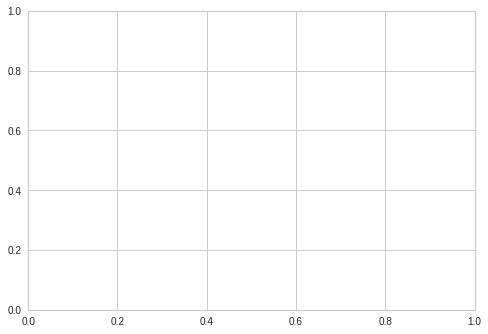

In [15]:
evaluate_model(best)

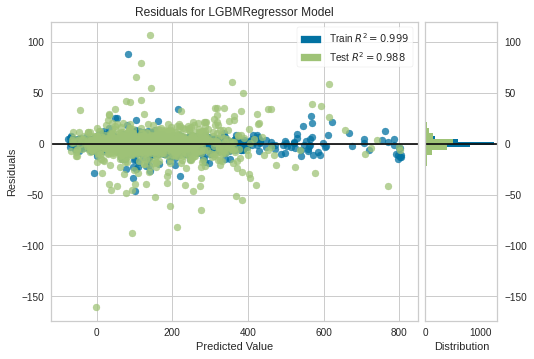

In [17]:
plot_model(best, plot = 'residuals')

In [ ]:
predict_model(best)

In [15]:
predictions = predict_model(best, data=prediction)
predictions.head()

NameError: name 'best' is not defined

In [18]:
save_model(best, 'regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       float_dtype='float32', id_columns=[],
                                       ml_usecase='regression',
                                       numerical_features=[],
                                       target='to_predict0', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical='not_available',
                                 fill_...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
            

# 